In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 6: Clustering
### Associated lectures: Lectures 15 and 16

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:6}

**Please be aware that this homework assignment requires installation of several packages in your course environment. It's possible that you'll encounter installation challenges, which might be frustrating. However, remember that solving these issues is not wasting time but it is an essential skill for anyone aspiring to work in data science or machine learning.**

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb. If the pdf or html also fail to render on Gradescope, please create two files for your homework: hw6a.ipynb with Exercise 1 and hw6b.ipynb with Exercises 2 and 3 and submit these two files in your submission.  
</div>

_Points:_ 6

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way. 

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus. 

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which 
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and 
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/arthurguo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/arthurguo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "Artificial Intelligence", "Deep learning", "Unsupervised learning", "Quantum Computing", 
    "Environmental protection", "Climate Change", "Renewable Energy", "Biodiversity",
    "French Cuisine", "Bread food", "Dumpling food"
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    text = sent_tokenize(wikipedia.page(queries[i]).content)[1]
    wiki_dict["text"].append(text)
    wiki_dict["n_words"].append(len(word_tokenize(text)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17
7,Biodiversity,It can be measured on various levels.,8
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries. 

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters? 
rubric={points}


**Your tasks:**

1. If you are asked to cluster the documents from this toy corpus manually, how many clusters would you identify and how would you label each cluster?   

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

**1.** We would manually identify 3 clusters:

1. The "ml" cluster contains the documents for "artifical intelligence", "deep learning", "unsupervised learning", and "quantum computing".
2. The "green" cluster contains the documents for "environmental protection", "climate change", "renewable energy", and "biodiversity".
3. The "food" cluster contains the documents for "French cuisine", "bread food", and "dumpling food".

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 `KMeans` with bag-of-words representation 
rubric={points}

In the lecture, we saw that data representation plays a crucial role in clustering. Changing flattened representation of images to feature vectors extracted from pre-trained models greatly improved the quality of clustering. 

What kind of representation is suitable for text data? We have used bag-of-words representation to numerically encode text data before, where each document is represented with a vector of word frequencies. 

Let's try clustering documents with this simplistic representation.  

**Your tasks:**

1. Create bag-of-words representation using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with default arguments for the `text` column in `wiki_df` above.
2. Cluster the encoded documents with [`KMeans` clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Use `random_state=42` (for reproducibility) and set `n_clusters` to the number you identified in the previous exercise.
3. Store the clustering labels in `kmeans_bow_labels` variable below. 

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 4

In [5]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

bow_sent_df = CountVectorizer().fit_transform(wiki_df["text"])
kmeans_bow = KMeans(n_clusters=3, random_state=42)
kmeans_bow_labels = kmeans_bow.fit_predict(bow_sent_df)

wiki_df["bow_kmeans"] = kmeans_bow_labels

display(wiki_df)

,wiki query,text,n_words,bow_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1
7,Biodiversity,It can be measured on various levels.,8,1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 Sentence embedding representation
rubric={points}

Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer and more expressive representations of text which can be extracted using transfer learning. In this lab, we will use one such representation called sentence embedding representation, which uses deep learning models to generate dense, fixed-length vector representations for sentences. We will extract such representations using sentence transformer package. Sentence embedding takes into account context of words and semantic meaning of sentences and it is likely to work better when we are interested in clustering sentences based on their semantic similarity. 

```
conda activate cpsc330
conda install pytorch::pytorch torchvision torchaudio -c pytorch
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus. 
2. Cluster documents in our toy corpus encoded with this representation (`emb_sents`) and `KMeans` with following arguments: 
    - `random_state=42` (for reproducibility)
    - `n_clusters`=the number of clusters you identified in 1.1
3. Store the clustering labels in `kmeans_emb_labels` variable below. 

In [6]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

# If this cell gives an error, try updating transformers with
# pip install transformers -U

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [7]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.102874,0.201959,0.044092,0.281749,0.321484,-0.281129,0.042515,0.083172,0.155722,-0.114267,...,0.310223,-0.141896,-0.153256,-0.058627,0.005015,-0.005808,0.630392,-0.023694,-0.071899,-0.115922
1,0.000321,0.428834,0.152298,-0.161278,0.224354,-0.363829,0.110951,0.042096,0.188453,0.188299,...,-0.092608,-0.117086,0.133018,0.207266,-0.395182,0.085347,0.677386,-0.405457,0.092259,-0.100412
2,0.236465,-0.282463,-0.258301,0.300584,0.234606,0.061746,-0.072744,0.045550,0.271853,0.054201,...,0.531342,-0.095102,0.316027,0.170600,-0.213746,0.110625,0.463024,-0.658667,0.246860,0.171115
3,0.276844,0.657946,0.106465,0.290567,0.803930,0.023764,0.136675,-0.030062,0.115825,0.244902,...,0.069148,-0.183727,0.217584,0.140797,-0.216237,0.128014,0.181907,-0.054304,0.131838,-0.016249
4,0.200327,0.157551,0.093484,0.120533,-0.439307,0.148569,-0.003543,-0.211190,-0.006088,-0.102895,...,0.187549,-0.430333,-0.350163,0.251643,0.115399,-0.053311,0.088485,0.307340,0.355386,0.024684
5,0.189105,0.406864,0.172560,0.273777,0.058933,0.224641,-0.056590,-0.242728,0.056221,0.127506,...,0.099108,-0.350095,0.070399,0.469786,0.003973,-0.130359,-0.105738,-0.091219,0.210350,0.072002
6,-0.066224,0.465511,-0.135840,-0.229255,-0.144746,0.013771,-0.122810,-0.172321,-0.278583,0.002541,...,-0.090149,-0.305185,-0.048772,-0.008465,0.145859,-0.153741,0.012771,0.507823,0.239723,0.015132
7,-0.139883,0.207129,-0.127447,0.214821,-0.099096,0.063319,-0.347634,-0.203128,0.325750,0.624156,...,0.311010,-0.036291,0.004326,0.078006,0.321024,-0.180906,0.553141,-0.010740,0.382759,0.032369
8,-0.112771,-0.259073,0.172584,-0.149188,-0.074584,0.222288,-0.213039,0.512004,0.216943,-0.200930,...,0.083372,0.196123,0.030323,-0.308584,0.061457,-0.008511,0.350081,0.456677,-0.352978,-0.053868
9,-0.022418,0.217159,0.022694,0.003616,0.240857,0.358046,-0.053310,-0.328076,0.190012,0.244470,...,0.265413,-0.415595,0.003036,0.052484,0.345947,0.110091,0.405441,0.197792,-0.058254,0.212376


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [8]:
kmeans_emb = KMeans(n_clusters=3, random_state=42)
kmeans_emb_labels = kmeans_emb.fit_predict(emb_sent_df)

wiki_df["emb_kmeans"] = kmeans_emb_labels

display(wiki_df)

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0
7,Biodiversity,It can be measured on various levels.,8,1,1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with cosine distance  
rubric={points}

Now try [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text data, [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work well. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$


**Your tasks**

1. Cluster documents in our toy corpus encoded with sentence embedding representation (`emb_sents`) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN) with `metric='cosine'`. You will have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values of these hyperparameters are unlikely to work well on this toy dataset.
2. Store the clustering labels in the `dbscan_emb_labels` variable below. 

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [9]:
from sklearn.cluster import DBSCAN

dbscan_emb = DBSCAN(eps=0.7, min_samples=1, metric="cosine")
dbscan_emb_labels = dbscan_emb.fit_predict(emb_sent_df)

wiki_df["emb_dbscan"] = dbscan_emb_labels

display(wiki_df)

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,0
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,0
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,0
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,0
7,Biodiversity,It can be measured on various levels.,8,1,1,1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,1,2
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={points}

**Your tasks:**

Try hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.
2. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

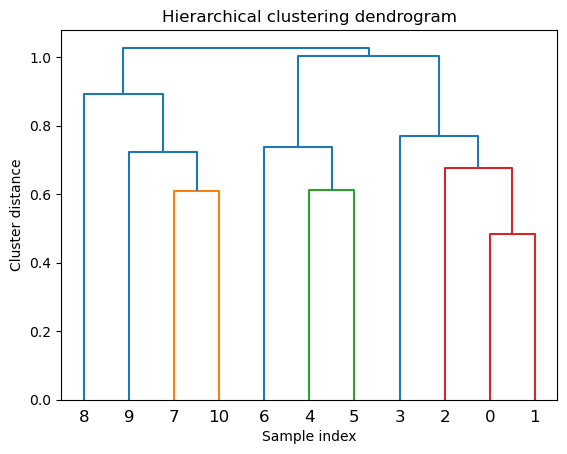

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

hier_emb_z = linkage(emb_sent_df, method="complete", metric="cosine")
ax = plt.gca()
dendrogram(hier_emb_z, ax=ax)
ax.set(title="Hierarchical clustering dendrogram", xlabel="Sample index", ylabel="Cluster distance")

plt.show()

In [11]:
from scipy.cluster.hierarchy import fcluster

hier_emb_labels = fcluster(hier_emb_z, 3, criterion="maxclust")
wiki_df["emb_hierarchical"] = hier_emb_labels

display(wiki_df)

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,Artificial Intelligence,It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.,40,2,2,0,3
1,Deep learning,"The field takes inspiration from biological neuroscience and is centered around stacking artificial neurons into layers and ""training"" them to process data.",25,1,2,0,3
2,Unsupervised learning,"The training data is processed, building a function that maps new data to expected output values.",18,1,2,0,3
3,Quantum Computing,"On small scales, physical matter exhibits properties of both particles and waves, and quantum computing leverages this behavior using specialized hardware.",24,1,2,0,3
4,Environmental protection,"Its objectives are to conserve natural resources and the existing natural environment and, where it is possible, to repair damage and reverse trends.",26,0,0,0,2
5,Climate Change,Climate change in a broader sense also includes previous long-term changes to Earth's climate.,16,1,0,0,2
6,Renewable Energy,"The most widely used renewable energy types are solar energy, wind power, and hydropower.",17,1,0,0,2
7,Biodiversity,It can be measured on various levels.,8,1,1,1,1
8,French Cuisine,"In the 14th century, Guillaume Tirel, a court chef known as ""Taillevent"", wrote Le Viandier, one of the earliest recipe collections of medieval France.",31,1,1,2,1
9,Bread food,"Throughout recorded history and around the world, it has been an important part of many cultures' diet.",20,1,1,1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={points}

**Your tasks:**

1. Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
    - effect of input representation on clustering results
    - whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

**1.a.** The input representation significantly affects the clustering results. When working with the bag-of-words representation, clusters are based simply on the degree of overlapping vocabulary, disregarding any underlying semantic meaning. As a result, most of the documents were placed in a single cluster even though they were not similar in meaning.

By contrast, the sentence embedding representation produced clusters that seem to be based more on the semantic meaning of the text. For example, the K-means and hierarchical models with sentence embedding were able to identify the same "ml" cluster as our manual approach, and were aligned quite well with our intuition in the other clusters as well.

**1.b.** The bag-of-words-based K-means model struggled to capture conceptual similarities in the documents when phrased differently, which led to rather unintuitive clusters.

The sentence embedding-based K-means and hierarchical clustering models produced equivalent results that aligned very closely with our intuition. In terms of challenges, the K-means model is limited to hypersphere-shaped clusters, which can make it a poor choice for certain problem spaces, though it performed well in this case. The hierarchical model is more difficult to interpret, especially with the variety of linkage methods and distance metrics available. In both cases, there is the possibility of introducing bias when deciding on the hyperparameters.

The DBSCAN model did not perform as well as the K-means and hierarchical models. The model was very sensitive to the choice of hyperparameters, and it was difficult to find values that would produce meaningful clusters. As a result, the predicted clusters did not align well with our intuition.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.* 

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html). 

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn 
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below. 
    - K-Means with bag-of-words representation 
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation 
    - Flat cluster of hierarchical clustering with sentence embedding representation     

In [12]:
import umap

In [13]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=50,
    n_neighbors=15,
    title="UMAP visualization",
    ignore_noise=False,
):
    """
    Carry out dimensionality reduction using UMAP and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    n_neighbors : int
        n_neighbors hyperparameter of UMAP. See the documentation.
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    Z = reducer.fit_transform(data)  # reduce dimensionality
    umap_df = pd.DataFrame(data=Z, columns=["dim1", "dim2"])
    umap_df["cluster"] = cluster_labels

    if ignore_noise:
        umap_df = umap_df[umap_df["cluster"] != -1]

    labels = np.unique(umap_df["cluster"])

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        umap_df["dim1"],
        umap_df["dim2"],
        c=umap_df["cluster"],
        cmap="tab20b",
        s=size,
        #edgecolors="k",
        #linewidths=0.1,
    )

    legend = ax.legend(*scatter.legend_elements(), loc="best", title="Clusters")
    ax.add_artist(legend)

    if show_labels:
        x = umap_df["dim1"].tolist()
        y = umap_df["dim2"].tolist()
        for i, txt in enumerate(raw_sents):
            ax.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
    plt.show()

<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


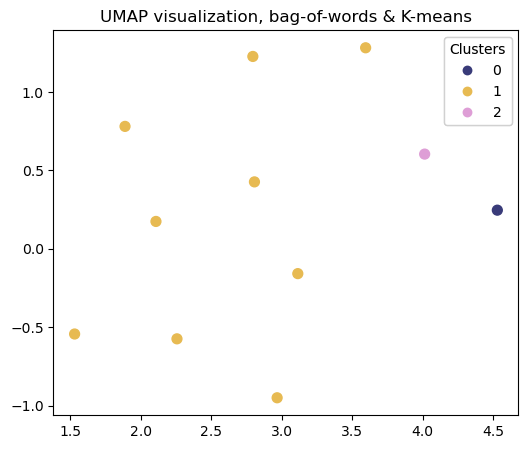

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


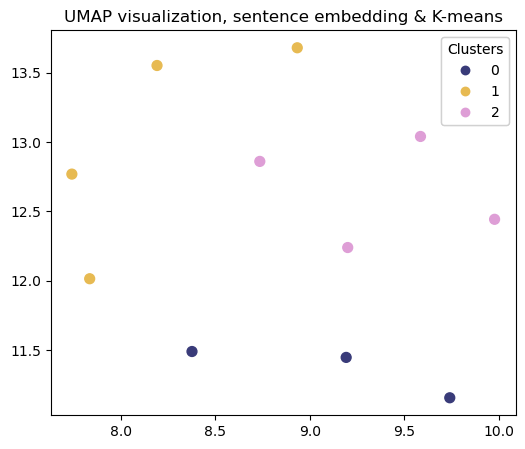

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


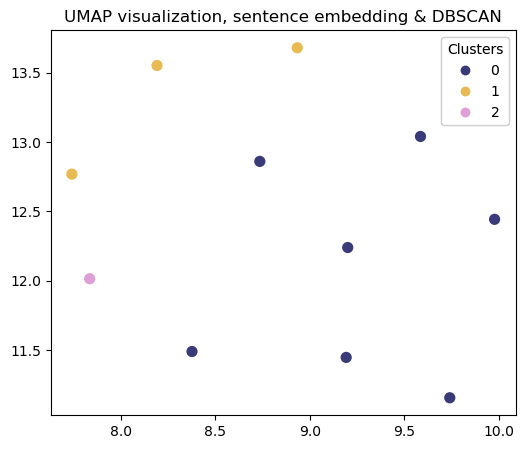

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


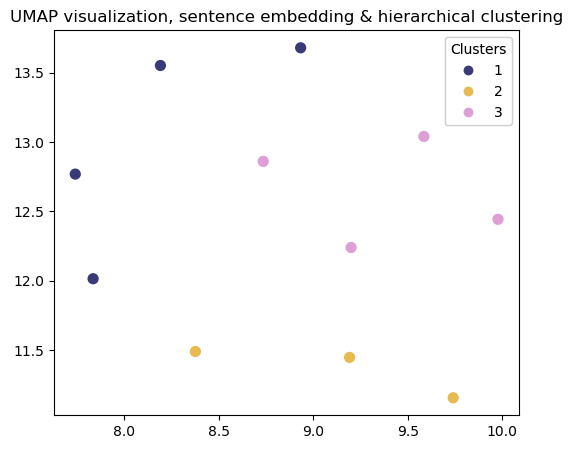

In [14]:
plot_umap_clusters(bow_sent_df, kmeans_bow_labels, title="UMAP visualization, bag-of-words & K-means")
plot_umap_clusters(emb_sent_df, kmeans_emb_labels, title="UMAP visualization, sentence embedding & K-means")
plot_umap_clusters(emb_sent_df, dbscan_emb_labels, title="UMAP visualization, sentence embedding & DBSCAN")
plot_umap_clusters(emb_sent_df, hier_emb_labels,   title="UMAP visualization, sentence embedding & hierarchical clustering")

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes 
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus. 

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this lab, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names. 

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder. 
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags. 

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.* 

In [15]:
orig_recipes_df = pd.read_csv("data/RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [16]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [17]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [18]:
recipes_df["name"]

42        i yam what i yam  muffins    
101       to your health  muffins      
129       250 00 chocolate chip cookies
138       lplermagronen                
163       california roll   salad      
                   ...                 
231430    zucchini wheat germ cookies  
231514    zucchini blueberry bread     
231547    zucchini salsa burgers       
231596    zuppa toscana                
231629    zydeco salad                 
Name: name, Length: 9100, dtype: object

<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.** 

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Longest and shorter recipe names 
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [19]:
shortest_recipe = None
longest_recipe = None

shortest_recipe = recipes_df["name"][recipes_df["name"].map(len).idxmin()]
longest_recipe  = recipes_df["name"][recipes_df["name"].map(len).idxmax()]

display(shortest_recipe, longest_recipe)

'bread'

'baked tomatoes with a parmesan cheese crust and balsamic drizzle'

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

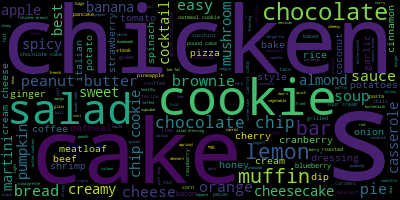

In [20]:
from wordcloud import WordCloud

recipes_word_cloud = WordCloud(random_state=42).generate(" ".join(recipes_df["name"]))

display(recipes_word_cloud.to_image())

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names. 

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [21]:
embeddings = None

recipes_embedded_names = embedder.encode(recipes_df["name"].to_numpy())
embeddings = pd.DataFrame(recipes_embedded_names, index=recipes_df.index)

display(embeddings.head())

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
42,-0.333475,0.227865,-0.307339,0.410549,0.917104,-0.345506,0.305810,0.256676,-0.147711,0.040728,...,-0.053024,-0.209463,0.362418,-0.246085,0.208379,-0.024874,0.506561,0.197738,-0.386421,-0.002183
101,-0.024523,0.246223,-0.055709,0.358273,0.454786,-0.088055,0.260368,0.231947,0.093013,-0.007835,...,0.144860,-0.435459,0.208343,-0.002655,-0.081199,-0.130489,0.452378,0.186310,-0.278500,0.028580
129,-0.026562,0.194671,0.038101,-0.099181,0.653784,-0.230869,0.064517,0.001376,-0.061281,0.232094,...,0.169605,0.239354,0.392649,0.271398,-0.093971,0.060101,-0.281417,0.133210,-0.122344,-0.109863
138,-0.168002,-0.219219,0.330761,0.302196,-0.173169,0.204557,0.192390,0.140975,0.303174,0.038063,...,0.019095,-0.002448,0.437833,0.563785,0.033442,0.187658,0.529252,-0.233787,0.509932,0.410715
163,0.061076,-0.333799,0.242906,0.395978,-0.466468,0.496505,-0.136754,0.122096,0.114249,0.065318,...,0.044438,-0.213657,0.410353,-0.233599,-0.224422,0.094331,0.173350,0.105782,-0.114749,-0.150677


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it. 

Here are some methods which may help you with picking reasonable values for the hyperparameters. 
- Visualize the Elbow plot (KMeans). 
- Visualize Silhouette plots. 
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1. 
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.) 
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.** 

In [22]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels), 
    sample and print n_recipes recipes per cluster. 

    Parameters
    -----------
    recipe_df : pandas dataframe 
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df 
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """    
    
    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")    
    )
    
    for name, group in grouped:
        print(f"Cluster {name}")        
        print(("----------").format(""))        
        print("\n".join(group.sample(n_recipes, replace=replace, random_state=random_state)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters. 
2. Pick one or two best models and justify your choice. 

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

**1.** See below.

**2.** We used the elbow method to determine that 17 is the optimal number of clusters. The silhouette score is only about 0.0155, which is not particularly impressive. Looking at the UMAP visualization, we would expect the silhouette score to be low because the dataset does not contain any visually distinct clusters. However, K-means is the model that most closely aligns with our intuition about how the data should be clustered. By examining samples from each cluster, we see in most cases there is a consistent semantic theme within each cluster. This is further explored in a later section.

For time and performance reasons, we limited the number of clusters to 50. It is possible that by increasing the maximum, the "elbow" could present at a different number of clusters.

In [23]:
from sklearn.metrics import silhouette_score

def get_silhouette_score(x, labels):
    if len(set(labels)) > 1: return silhouette_score(x, labels)
    return -1

def silhouette_scorer(estimator, x):
    return get_silhouette_score(x, estimator.fit_predict(x))

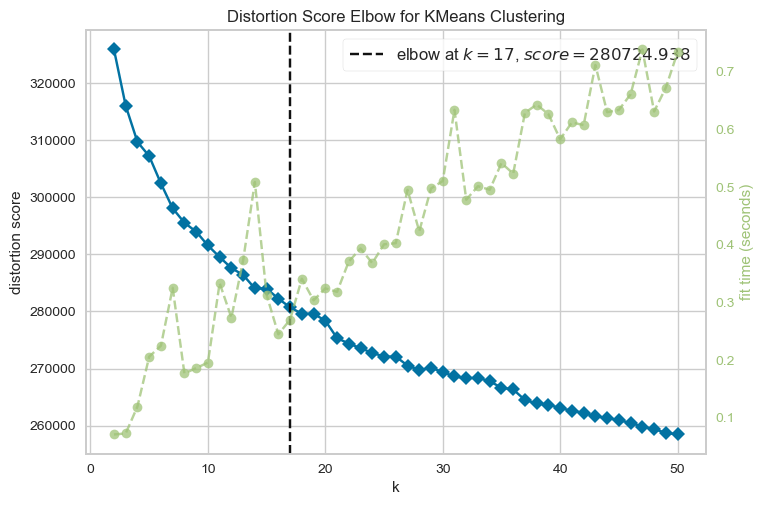

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


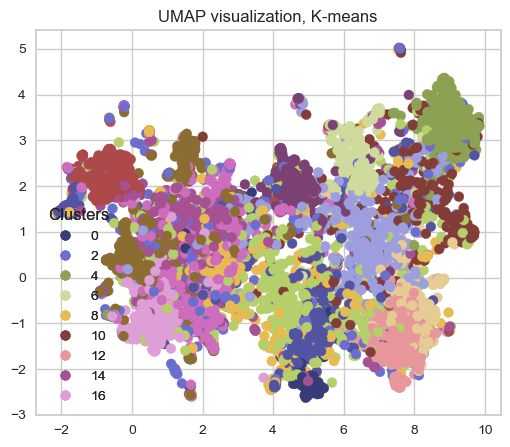

KMeans(n_clusters=17, random_state=42)

'K-means silhouette score: 0.01553716603666544.'

In [24]:
from yellowbrick.cluster import kelbow_visualizer

recipes_kmeans_kelbow = kelbow_visualizer(KMeans(random_state=42), embeddings, k=50)
recipes_kmeans_best_k = recipes_kmeans_kelbow.elbow_value_

recipes_kmeans_kelbow.show()

recipes_kmeans = KMeans(n_clusters=recipes_kmeans_best_k, random_state=42)
recipes_kmeans_labels = recipes_kmeans.fit_predict(embeddings)
recipes_kmeans_silhouette = get_silhouette_score(embeddings, recipes_kmeans_labels)

plot_umap_clusters(embeddings, recipes_kmeans_labels, title="UMAP visualization, K-means")
display(recipes_kmeans, f"K-means silhouette score: {recipes_kmeans_silhouette}.")

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`. 

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

Even with hyperparameter optimization with silhouette as the scoring method, the DBSCAN model placed all of the data into a single cluster (except for one point classified as noise). The silhouette score is about 0.199, which seems much better than the K-means model, but looking at the UMAP visualization we can clearly see that the results are not intuitive. The single cluster is not semantically meaningful in any way.

The nature of DBSCAN clustering makes it an inherently poor choice for this dataset---it tries to find dense areas, but in this case the dataset is shaped like a solid mass with relatively even density throughout. Additionally, it is quite difficult to tune or interpret the hyperparameters.

We assume that due to how the silhouette score is calculated, the DBSCAN model is able to achieve a higher score despite producing obviously flawed results.

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


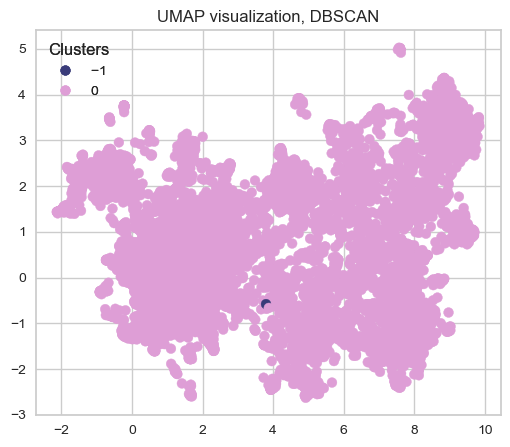

DBSCAN(eps=0.7061224489795919, metric='cosine', min_samples=77)

'DBSCAN silhouette score: 0.1994674950838089.'

In [25]:
from sklearn.model_selection import RandomizedSearchCV

recipes_dbscan_search = RandomizedSearchCV(DBSCAN(metric="cosine"), { "eps": np.linspace(0.1, 10), "min_samples": np.arange(1, 100) }, n_iter=100, scoring=silhouette_scorer, cv=2, random_state=42)
recipes_dbscan_search.fit(embeddings)

recipes_dbscan = recipes_dbscan_search.best_estimator_
recipes_dbscan_labels = recipes_dbscan.labels_
recipes_dbscan_silhouette = get_silhouette_score(embeddings, recipes_dbscan_labels)

plot_umap_clusters(embeddings, recipes_dbscan_labels, title="UMAP visualization, DBSCAN")
display(recipes_dbscan, f"DBSCAN silhouette score: {recipes_dbscan_silhouette}.")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method. 
2. Create flat clusters by cutting the tree at the appropriate level. 

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

From K-means, we know that a reasonable number of clusters is 17. Hence, for hierarchical clustering, we performed iterative hyperparameter optimization in a smaller range around this number. This is a safer approach than maximizing the silhouette score for any number of clusters, which can produce unintuitive results (as seen in DBSCAN).

The process determined that the optimal linkage method and max. clusters is "average" and 7, respectively. The hierarchical clustering model produced a large cluster with the majority of the data, then 6 small ones with only a few points each. The silhouette score is about 0.129, which is higher than K-means. However, by looking at the UMAP visualization and samples from each cluster, we notice the clusters are quite unbalanced and are less aligned with our intuition overall.

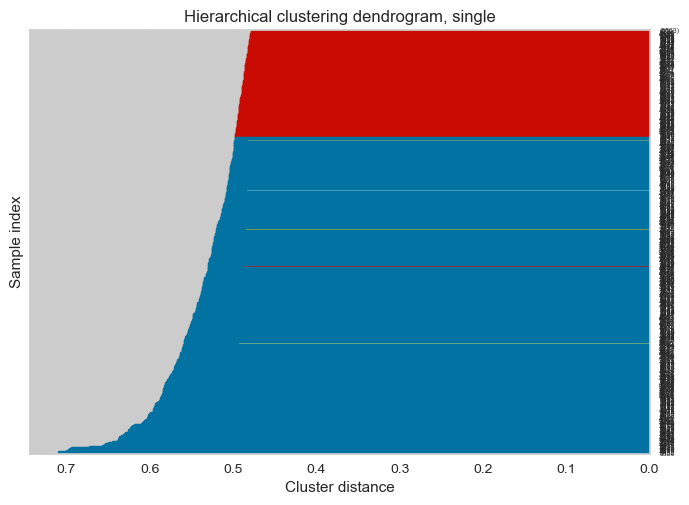

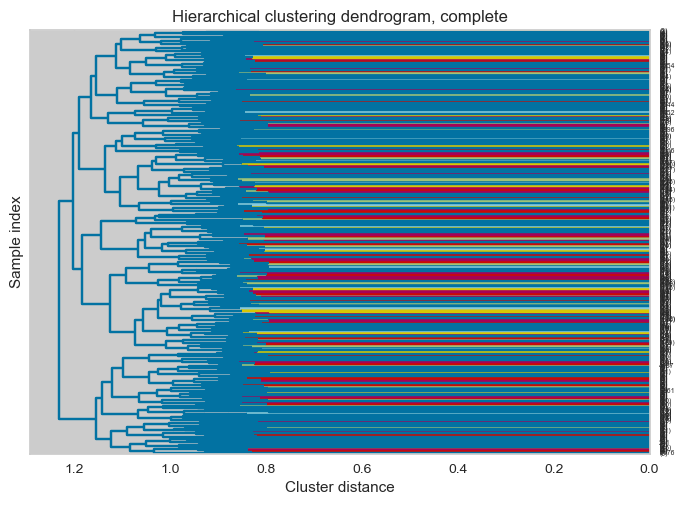

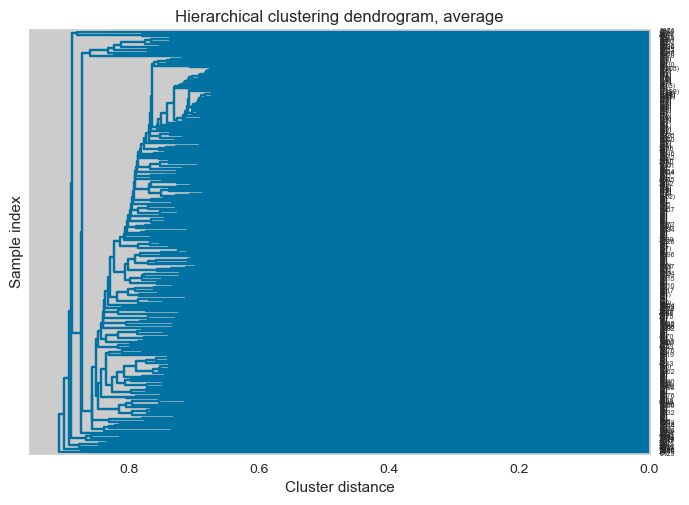

/opt/homebrew/Caskroom/miniconda/base/envs/cpsc330/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


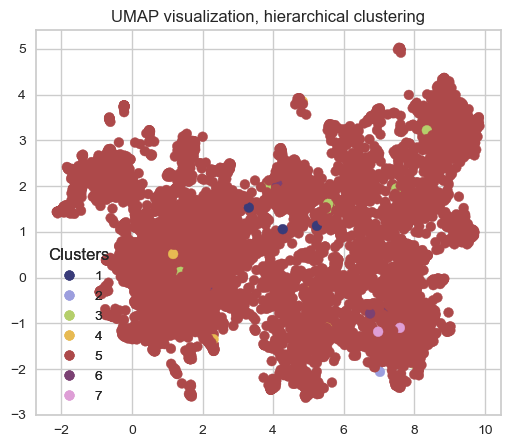

'Linkage method: average, 7 clusters.'

'Hierarchical clustering silhouette score: 0.12948763370513916.'

In [26]:
recipes_hier_linkage_method = None
recipes_hier_maxclust = -1
recipes_hier_labels = None
recipes_hier_silhouette = -1

for linkage_method in ["single", "complete", "average"]:
    recipes_hier_z = linkage(embeddings, method=linkage_method, metric="cosine")
    ax = plt.gca()
    dendrogram(recipes_hier_z, p=500, truncate_mode="lastp", orientation="left", ax=ax)
    ax.set(title=f"Hierarchical clustering dendrogram, {linkage_method}", xlabel="Cluster distance", ylabel="Sample index")

    for maxclust in np.arange(7, 27):
        labels = fcluster(recipes_hier_z, maxclust, criterion="maxclust")
        silhouette = get_silhouette_score(embeddings, labels)

        if silhouette > recipes_hier_silhouette:
            recipes_hier_linkage_method = linkage_method
            recipes_hier_maxclust = maxclust
            recipes_hier_labels = labels
            recipes_hier_silhouette = silhouette

    plt.show()

plot_umap_clusters(embeddings, recipes_hier_labels, title="UMAP visualization, hierarchical clustering")
display(f"Linkage method: {recipes_hier_linkage_method}, {recipes_hier_maxclust} clusters.", f"Hierarchical clustering silhouette score: {recipes_hier_silhouette}.")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

**1.** See below.

For K-means, we have provided our interpretation of the topic along with some samples from each cluster. We see that the clusters are for the most part quite coherent and align well with our intuition, although there are potentially still some recipes that are incorrectly classified.

For hierarchical clustering, we had difficulty interpreting the clusters. We were unable to identify a coherent theme in many of the clusters. In addition, the clusters are unbalanced and do not align well with our intuition. However, we have provided some guesses as to what the clusters might represent.

For DBSCAN, we did not attempt manual interpretation. There is a single cluster containing all but one of the recipes. In this case, the single cluster has no particular semantic meaning, so we are unable to provide any meaningful interpretation.

**2.** The K-means clusters are quite distinct from the DBSCAN and hierarchical clustering clusters. The K-means clusters express a good amount of semantic meaning, while the DBSCAN and hierarchical clusters are less effective. We do not see a common theme across the clusters created by different clustering methods---they are all quite different, though we can say that the K-means was the most effective strategy for this dataset.

In [27]:
recipes_kmeans_interpretation = ["00 martini", "01 other drinks", "02 unknown", "03 dessert", "04 cookies", "05 snacks", "06 breakfast", "07 sides", "08 international", "09 cakes", "10 brownies", "11 salads", "12 also cakes", "13 bread", "14 baked dishes", "15 meat", "16 chicken"]
recipes_kmeans_interpreted_labels = [recipes_kmeans_interpretation[label] for label in recipes_kmeans_labels]

print_clusters(recipes_df, recipes_kmeans_interpreted_labels, n_recipes=10, random_state=42)

Cluster 00 martini
----------
chocolate covered african cherry martini
godiva raspberry martini
french martini
julie s turkey tetrazzini
candy corn martini
mike s candy apple martini
morta de chocolata gelatini   death by chocolate martini
caramel macchiato martini
apricot mango martini
mistletoe martini



Cluster 01 other drinks
----------
lime ginger syrup for fruit salads  weight watchers
queen soda
go go juice
cilantro lime vinaigrette
tangy lemon bars
right on  adult beverage
sage   mint tea  for sore throats and more
cupid s cocktail
moroccan spiced nuts
sweet   sour lemon drop



Cluster 02 unknown
----------
tyler florence s shrimp scampi with linguine
t g i  friday nutty accountant
what she s having
memphis chopped cole slaw
mamere s crybabies
chicken fonda
asian slaw with ginger peanut dressing
pink caddy
emeril s slow cooked bam b q baked beans
red snapper puttanesca  cooking light



Cluster 03 dessert
----------
ww core fiesta tamale pie in a pan
citrus cranberry delight


In [28]:
recipes_hier_interpretation = ["1 unknown", "2 unknown", "3 unknown", "4 maybe snacks", "5 maybe dessert", "6 maybe silly names", "7 maybe pirate theme"]
recipes_hier_interpreted_labels = [recipes_hier_interpretation[label - 1] for label in recipes_hier_labels]

# Sampling with replacement because there are fewer than 10 recipes in most clusters.
print_clusters(recipes_df, recipes_hier_interpreted_labels, n_recipes=10, replace=True, random_state=42)

Cluster 1 unknown
----------
parker house rolls  made by hand
yeast rolls
tie me to the bedpost
yeast rolls
yeast rolls
an elbow in the boobs
tie me to the bedpost
tie me to the bedpost
tie me to the bedpost
yeast rolls



Cluster 2 unknown
----------
the next best thing to brad pitt
betsy clear
just peachy
the next best thing to brad pitt
the next best thing to brad pitt
betsy clear
just peachy
just peachy
the next best thing to brad pitt
essential boy bribes



Cluster 3 unknown
----------
hermits
betty crocker s hermits
mob witnesses
lemon jumbles
holyfield s ear
hermits
tvp crumbles
loved up
hermits
mob witnesses



Cluster 4 maybe snacks
----------
take out tabbouleh
critter crunch
afternoon pick me up
claim jumper asian pear salad with citrus dressing
take out tabbouleh
health chews
claim jumper s crunchy spinach salad
take out tabbouleh
afternoon pick me up
claim jumper asian pear salad with citrus dressing



Cluster 5 maybe dessert
----------
golden sesame braid
penzeys tandoo

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

![](img/eva-well-done.png)